<a href="https://colab.research.google.com/github/clanderson23/Grocery-Analysis/blob/main/Grocery_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Market Analysis: Online Grocery Orders



by Cheryl Anderson 

October 2022

##Process

**Dataset:** https://www.kaggle.com/datasets/jackdaoud/marketing-data

**Goal:** This project contains critical information about consumer habits regarding online grocery purchases. Our goal is to look at the factors which contribute to the highest sales. 

**Process:** Using statistical analysis in Python, we will investigagte which factors influence sales the most, taking into account statistical correlation and p-value to determine the most valuable demographics to target in advertising. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats.stats import ttest_ind
from scipy import stats
sns.set()
from google.colab import drive
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
market_df=pd.read_csv('/content/gdrive/My Drive/ifood_df.csv')

market_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
market_df.shape

(2205, 39)

In [ ]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

There are 39 columns of very important information about our consumer's purchases. First, let's look at income.


# Income


##Statistical Analysis
**Null Hypothesis:** Income does not have a statistically significant influence on customer's purchase habits. 

**Alternative Hypothesis:** Income does have a statistically significant influence on customer's purchase habits.

Let's investigate the relationship between 'Income' and 'NumStorePurchases,' or the number of purchases made by each consumer.  

In [ ]:
#Get statistics on Income. 


In [ ]:
market_df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

The mean income for this dataset is 51,622, with more than 50% of the population making between 51,287 to 68,281.

Now let's look at correlations between 'Income' and 'NumStorePurchases.'

In [ ]:
market_df['Income'].corr(market_df['NumStorePurchases'])

0.687205716297932

The correlation is close to 1, so there is a positive relationship between these two factors. Let's do a statistical test to determine a p-value. 

In [ ]:
from scipy import stats
stats.pearsonr(market_df['Income'], market_df['NumStorePurchases'])

(0.687205716297932, 4.428408588774628e-308)

**Alternative Hypothesis is Correct:** The p-value is very small, and negative. This indicates that the lower the income, the less purchases are made. This is logical, but let's put some visuals to it so we can see where best to stack our advertising budget for this demographic. 

##Visualizations

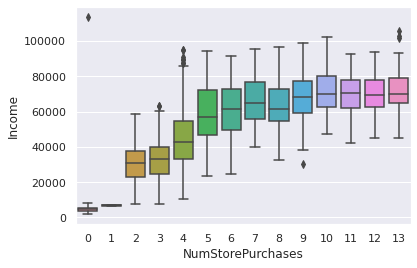

In [ ]:
import seaborn as sns
sns.boxplot(y='Income', x= 'NumStorePurchases', data=market_df)

##Recommendation

The higher number of purchases comes from the Incomes between 51K-68K per year. Target marketing towards this demographic.  

# Number of Small Children in Household

The number of small children in the household is represented by the column 'Kidhome.' Let's investigate this column of data to learn more.

##Statistical Analysis

**Null Hypothesis:** There is no statistically significant relationship between number of small children in the household ('Kidhome') and number of store purchases ('NumStorePurchases')

**Alternative Hypothesis:** There is a statistically significant relationship between number of small children in the household ('Kidhome') and number of store purchases ('NumStorePurchases')

In [ ]:
market_df['Kidhome'].describe()

count    2205.000000
mean        0.442177
std         0.537132
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

75% of the costumers in this dataset have 1 child at home. This can be a very important factor on number of store purchases. Let's see if there is a correlation. 

In [ ]:
market_df['Kidhome'].corr(market_df['NumStorePurchases'])

-0.506543168133882

The statistical correlation is close to -1, therefore there is a relationship, and it is negative. It is likely that those who have small children do not have as many store purchases. Let's do a pearsonr test to determine the p-value to make sure. 

In [ ]:
stats.pearsonr(market_df['Kidhome'], market_df['NumStorePurchases'])

(-0.5065431681338823, 4.851382514503082e-144)

**Alternative Hypothesis is Correct:** The p-value is very small, and negative. This indicates that the fewer children are in the home, the *more* purchases are made. This is logical, but let's put some visuals to it so we can see where best to stack our advertising budget for this demographic. 

##Visualizations

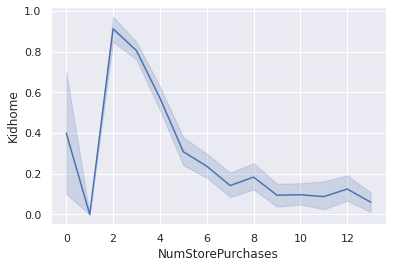

In [ ]:
sns.lineplot(y='Kidhome', x= 'NumStorePurchases', data=market_df)

## Recommendation 

Households with no small children have more purchases overall than households with small children. Of the households with small children, the houses with 1 small child had greater purchases than those with more than one child. Households with no small children are the demographic to target to drive sales for this market.

# Number of Teenagers in Household


##Statistical Analysis

**Null Hypothesis:** The number of teenagers in household ('Teenhome') does not have an impact on number of store purchased ('NumStorePurchases')
**Alternative Hypothesis:** The number of teenagers in household ('Teenhome') does have an impact on number of store purchased ('NumStorePurchases')

In [ ]:
market_df['Teenhome'].describe()

count    2205.000000
mean        0.506576
std         0.544380
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [ ]:
market_df['Teenhome'].corr(market_df['NumStorePurchases'])

0.04732114813553781

This number is close to 0, indicating there may not be any correlation between teens in the household and number of store purchases. Let's investigate further. 

In [ ]:
stats.pearsonr(market_df['Teenhome'], market_df['NumStorePurchases'])

(0.04732114813553772, 0.02627896750707939)

##Visualizations

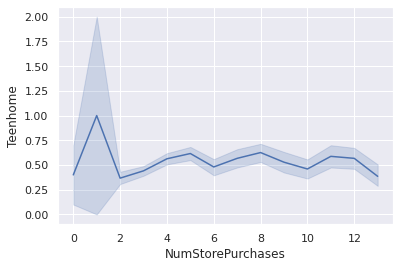

In [ ]:
sns.lineplot(y='Teenhome', x= 'NumStorePurchases', data=market_df)

From the above measures, we can conclude that households with less teens in the home make more purchases.

##Recommendation 

Households with no teenagers tend to have more purchases than households with teenagers. Target our marketing to the demographics with few or no children. This could be a result of income decreasing with number of children increasing. Let's investigate that in our next statistcal analysis. 